 
<br>
<h1 align="center">《基于多种方法的中文文本情感分析》</h1>
 
<br><br>


### 问题：中文文本情感分析

查阅相关资料，对上述提供的约12万条微博中文文本数据集，完成下述情感分析问题。

通过中文文本数据预处理（如删除非中文字符等）；使用jieba库分词（pip install jieba)；引入停用词 （stop_words.txt)；特征编码（词频或tf-idf或其它编码方法)， 将文本数据转化为特征向量。然后将正负向评论两类数据集都分别按7：3比例分为训练集和测试集。使用合适的分类算法，分别给出在训练集和测试集上的 `准确率，精度，召回率 和F1得分`指标，并画出ROC曲线，给出曲线下方面积值。

要求：提交一份jupyter notebook 格式的文档,文档名用本队成员姓名命名；该文档主要包含如下内容

1. 对中文自然语言处理这一研究方向做简单介绍；
2. 提供三种完整解决方案（包括改进方案），并从训练时间，测试时间，测试得分等方面比较三种解决方案的优缺点。 每种方案都应该有相应的算法原理介绍，算法步骤，代码实现，实验结果及分析等
3. 评估及结论 
4. 相应的参考文献  
5. 在文档后面应附上每位队成员所做的主要工作（如是算法原理介绍，代码编写，实验分析，改进方案，分类模型优缺点分析等）

作业提交时间: 2022.6.20前每队负责人将作业发到邮箱， 并附上队成员信息（学号，姓名）。
### 

## 1. 中文自然语言处理简介

### 1.1 自然语言处理的概览
&emsp;&emsp;自然语言处理的研究从二战结束后的机器翻译和人工智能的研究算起的话，己经有长达半个多世纪的发展历程。自然语言的处理所涉及的任务主要有: `机器翻译、信息检索、文本概括、人机问答、信息提取、主题模型`，现在对语法、句法的研究越来越突出。

### 1.2 自然语言的三个发展阶段   

+   **早期自然语言处理**

&emsp;&emsp;第一阶段(60~80年代):基于规则来建立词汇、句法语义`分析、问答、聊天和机器翻译系统`。好处是规则可以利用人类的内省知识，不依赖数据，可以快速起步；问题是覆盖面不足，像个玩具系统，规则管理和可扩展一直没有解决。 
+   **统计自然语言处理**

&emsp;&emsp;第二阶段(90年代开始)：基于统计的机器学习(ML)开始流行，很多NLP开始用`基于统计的方法`来做。主要思路是利用带标注的数据，基于人工定义的特征建立机器学习系统，并利用数据经过学习确定机器学习系统的参数。运行时利用这些学习得到的参数，对`输入数据进行解码，得到输出`。机器翻译、搜索引擎都是利用统计方法获得了成功。
+  **神经网络自然语言处理** `[1]`

&emsp;&emsp;第三阶段(2008年之后)：深度学习开始在语音和图像发挥威力。随之，NLP研究者开始把目光转向`深度学习`。先是把深度学习用于`特征计算`或者建立一个新的特征，然后在原有的统计学习框架下体验效果。比如，搜索引擎加入了深度学习的检索词和文档的相似度计算，以提升搜索的相关度。自2014年以来，人们尝试直接通过`深度学习建模`，进行`端对端的训练`。目前已在机器翻译、问答、阅读理解等领域取得了进展，出现了深度学习的热潮。


### 1.3 中文自然语言处理

&emsp;&emsp;对于中文自然语言处理，相对于英语，又有所不同，于中文自然语言处理，相比于英语等有天然分隔符的语言，难度更大。例如，界定单词`边界的词法分析`任务，也被称为“中文自动分词”的任务，是中文语言处理的首要步骤。其中，`新词发现、歧义切分`等关键问题又是`基于对语言的理解`之的。中文自然语言处理是以转换自然语言为基本原则，遵循基于规则、基于统计等研究思路，并且适当添加一些可靠的实例来完成翻译过程。

&emsp;&emsp;中文自然语言处理主要体现在`中文自然语言信息主题知识获取瓶颈`处理上，因为中文自然语言处理的领域以及时间的处理、对机器翻译的知识性等都应当进一步结合这种模式的深度和难度，最后完成中文自然语言处理的`传统信息知识处理`。需要注意的是应当根据语义网来更加直观的分析系统规划的各个流程，然后依据适应性来适当增加对中文自然语言有关知识的系统支持和关注。`[2]`

&emsp;&emsp;随着人工智能相关技术的不断发展，中文自然语言处理和计算机的结合问题也将会面临大量的知识成本，这就要求从中文自然语言的处理、发展历程以及传统处理手段等来进一步对建模的核心问题完成相应的处理。

## 2. 问题分析

### 2.1 整体思路   

> &emsp;&emsp;这是典型的 `中文文本情感分析` 问题，对此我们通常先进行 `中文自然语言` 处理。  
> 然后选取合适的向量化方法进行`特征编码`，选取合适的分类模型进行`分类训练`。
> 
> &emsp;&emsp;观察到问题所提供的数据规模较大(12万条)，对此我们提出以下优化方向：
> - 使用因特尔提供的 `sklearnex 加速`方案，减少训练耗时。
> - 评估出合适的`特征编码`方案，减少编码过程中的内存占用。
> - 使用`网格搜索`，通过不同参数组合尝试去获取最优的模型。
> - 相对批量学习，使用`在线学习`进行增量学习，减少内存占用。

### 2.2 逐题分析

> 1. **对中文文本数据进行预处理，保存到新文件**  
> - 对 12 万条样本数据逐条进行以下处理：去除非中文字符、过滤单网名、分词处理、去除停用词。
> - 由于样本数据规模较大，我们建议将预处理好的数据保存到新文件中，避免重复做无用功。

> 2. **特征编码，将文本数据转化为特征向量**  
> - CountVectorizer 需要在内存保存全部的词汇，无法调用其做核心学习。
> - TfidfVectorizer 需要把训练集的所有特征向量保存在内存，以计算逆文档频率。
> - HashingVectorizer 无需在内存中存储词汇表，占用内存非常低，可应用于大型数据集。

> 3. **将正负向评论按 7:3 比例分为训练集和测试集**
> - 针对`批量学习`算法，我们将调用 `sklearn` 的库函数进行划分。
> - 针对`在线学习`算法，每次拟训练1000条样本数据，12万条可划分为120批，
> - 前 85 批用来进行小批次增量学习，余下35000条用来进行测试。

> 4. **提供三种方案，给出训练集和测试集上的 `准确率，精度，召回率 和F1得分`**
> - 逻辑回归模型(Logistic)
> - 随机梯度下降模型(SGD)
> - 基于在线学习的 SGD

> 5. **画出ROC曲线，给出曲线下方面积**

## 3. 数据预处理

### 3.1 中文文本数据预处理

- 原样本为前 6 万条为正类，后 6 万条为负类，避免在线学习出现过拟合现象，需对样本数据进行 `洗牌处理`。
- 去除样本中的网名昵称、非中文字符，再对中文文本 `分词处理，去除停用词`，去除空语句。
- 将预处理完成的数据写入 weibo_senti.csv，以供减少模型训练所需时间。

- `preprocess()`：预处理样本数据，并将处理好的数据保存到新文件中。

In [1]:
from sklearnex import patch_sklearn
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import warnings
import jieba
import csv
import re

patch_sklearn() # 用以加速模型训练
warnings.filterwarnings("ignore")

pd_all = pd.read_csv('weibo_senti_100k.csv')    # 加载原始样本数据
pd_shuffled = shuffle(pd_all, random_state=100) # 打乱原始样本数据
file_processed = "weibo_senti.csv"      # 用以命名已预处理数据的文件

# 读入停用词列表，用于匹配删除文本中的停用词
stop_words = [line.strip() for line in open("stop_words.txt", 'r').readlines()]

def preprocess(origidata=pd_shuffled, newfile=file_processed, stopwords=stop_words):
    """ 对12万条样本(origidata)中的评论进行预处理，保存到 `newfile` 中，以供模型训练。
        
        读取原始样本数据，针对原始样本的每条评论进行分词处理，以空格分隔词语，
        去除网名、停用词等，仅保留中文字符，最后以(label,review)的形式存入文件。

        例如，正类评论保存为：1, 更博 爆照 帅 越来越 爱 生快 傻 缺爱 爱 爱。
    """
    with open(newfile, 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['label', 'review'])

        for _, row in origidata.iterrows():
            # 对单条语句进行文本预处理，过滤网名，去除非中文字符。
            seten = re.sub('@.*?[\s:：]|[^\u4e00-\u9fa5]', '', row['review'])

            # 利用 jieba 库对 单条语句 进行分词处理
            seten = jieba.lcut(seten)

            # 如果语句中的词语不是停用词(即不再停词列表中)，则加入列表
            seten = [word for word in seten if word not in stopwords]

            if seten: # 如果语句不为空，则写入文件，即清洗掉空语句
                # 将(标签，分词过的单条语句)存入CSV文件，以供后续使用
                writer.writerow([row['label'], ' '.join(seten)])
                

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### 3.2 批量学习依赖函数

- `tokenizer()`：对已预处理的数据直接令牌化，推荐使用。
- `tokenizer_process`：具有预处理功能的令牌化函数。

In [2]:
def tokenizer(text: str)-> list:
    """ 针对 `已利用preprocess()预处理` 的数据进行 `令牌化` 。  

        已预处理的12万条评论，其中每条评论已经分词处理，词语间以空格分隔，
        去除网名、停用词，仅含中文字符，因此不需要再去除停用词。
        例如，正类评论：“更博 爆照 帅 越来越 爱 生快 傻 缺爱 爱 爱”。
        只需要将上述样本转成列表，传入模型训练即可。
    """
    return text.split()

def tokenizer_process(text: str)-> list:
    """ 针对未预处理的数据进行令牌化
        需要进行中文字符过滤处理、分词处理等
        为加快模型训练，建议使用 `函数tokenizer()`
    """
    seten = re.sub('@.*?[:：]|[^\u4e00-\u9fa5]', '', text)
    seten = jieba.lcut(seten)

    return seten

### 3.3 在线学习依赖函数

- `stream_docs()`：生成器函数，每次小批量读入数据并返回一个文档，以供在线学习使用。
- `get_minibatch()`：每次从生成器中获取小批次数据，可用于获取训练集、测试集。

In [3]:
def stream_docs(path):
    """ 迭代读取CSV文件，返回(标签, 评论) """
    try:
        with open(path, 'r', encoding='utf-8') as csv:
            next(csv)  # 跳过第一行的标题
            for line in csv:
                label, text = int(line[0]), line[2:]
                yield label, text
    except:
        # 若找不到已预处理的CSV文件，则重新预处理
        print("找不到文件路径，请调用函数 preprocess() 预处理数据")
        # preprocess()

def get_minibatch(doc_stream, size):
    """ 从生成器中返回指定条数的数据 """
    docs, y = [], []
    try:
        for _ in range(size):
            label, text = next(doc_stream)
            docs.append(text)
            y.append(label)
    except StopIteration:
        return docs, y
    return docs, y

## 4. 模型训练

- 在此节中，我们选取以下三种方案进行分类训练:  
- 1.基于网格搜索的逻辑回归模型
- 2.基于网格搜索的随机梯度下降
- 3.基于在线学习算法的梯度下降

### 4.1 基于 `逻辑回归` 算法分类

#### 4.1.1 **logistic** 回归算法理论

&emsp;&emsp;logistic 回归模型学习时，对于给定的训练数据集 
$T = \lbrace (x_1,y_1),(x_2,y_2),...,(x_N,u_N) \rbrace $ ,其中， $x_i \in R^n,y_i \in {0,1}$ ,

&emsp;&emsp;可以应用 `极大似然估计法` 估计模型参数，从而得到 logistic 回归模型。

&emsp;&emsp;设： $$P(Y=1|x)= \pi(x),\quad P(Y=0|x)=1- \pi(x)$$ 

&emsp;&emsp;似然函数为: $$ \prod_{i=1}^{N} [\pi(x_i)]^{y_i}[1-\pi(x_i)]^{1-y_i} $$

&emsp;&emsp;对数似然函数为$$\begin{align} L(w) &=\sum_{i=1}^{N}[y_i log\pi(x_i)+(1-y_i)log(1-\pi(x_i))]\\ &=\sum_{i=1}^{N}[y_i log\frac{\pi(x_i)}{1-\pi(x_i)}+log(1-\pi(x_i))]\\ &=\sum_{i=1}^N [y_i(w \cdot x_i)-log(1+e^{(w \cdot x_i)})] \end{align}$$

&emsp;&emsp;对 $L(w)$ 求极大值 ，得到 $w$ 的估计值。

&emsp;&emsp;假设 $w$ 的极大似然估计值是 $\hat(w)$ ,那么得到的 `logistic 回归模型`为: $$P(Y=1|x)=\frac{e^{(\hat{w}\cdot x)}}{1+e^{(\hat{w}\cdot x)}} \\ P(Y=0|x)=\frac{1}{1+e^{(\hat{w}\cdot x)}}$$

#### 4.1.2 训练集和测试集的划分

- 读取预处理后的CSV文件，数据为乱序的标签及评论对，一共12万条。
- 将12万条已预处理的数据按照 7:3 划分为训练集和测试集。
- 划分后的训练集测试集可供 4.1节的逻辑回归模型，4.2节的SGD模型训练。

In [4]:
# 加载 12 万条已预处理好的样本数据集
# 若找不到已预处理的文件，则调用函数预处理
# preprocess() 
df_processed = pd.read_csv(file_processed)
X_all = df_processed['review']
y_all = df_processed['label']

# 按照 7:3 分隔训练集、测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,test_size=0.3, random_state=100)

#### 4.1.3 基于 **`网格搜索`** 的 **`logistic`** 回归模型训练
- 利用网格搜索尝试寻找最优模型。
- 为评估三种模型的训练速度等各项指标，网格搜索均已使用模型各自的最优参数。

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier


pipe = Pipeline([
    ("tfid", TfidfVectorizer()),
    ("logit", LogisticRegression())
])

param_grid = [{
    "tfid__ngram_range": [(1, 1)],
    "tfid__tokenizer": [tokenizer],
    "logit__C": [1],
    "logit__solver": ["sag"]
}]

logis = GridSearchCV(pipe, param_grid, n_jobs=-1)

logispara = logis.fit(X_train, y_train)

#### 4.1.4 **logistic** 回归模型的各项评分及 ROC
- 函数 **`estimate_model()`** 输出以下指标：
- 训练集及测试集上的准确率、精度、召回率、F1得分。
- 训练集及测试集上的ROC曲线、ROC曲线下的面积

训练集上的准确率：0.95380,	测试集上的准确率：0.93280
训练集上的精度：  0.93908,	测试集上的精度：0.91465
训练集上的召回率：0.97039,	测试集上的召回率：0.95428
训练集上的F1得分：0.95448,	测试集上的F1得分：0.93404
训练集上ROC面积: 0.98624, 测试集上ROC面积: 0.97764


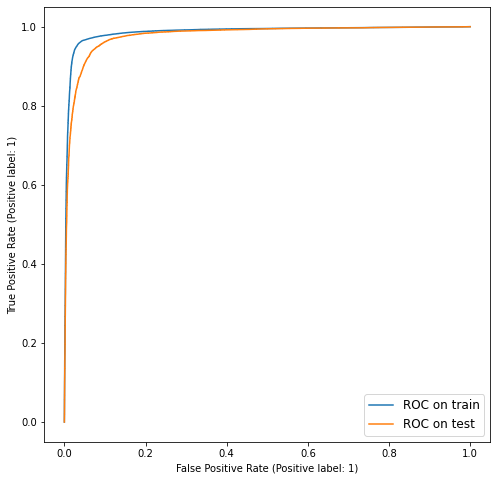

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, roc_auc_score
import matplotlib.pyplot as plt


def estimate_model(clf: GridSearchCV):
    """ 测试模型，输出模型的各项得分，ROC 图 """
    # 利用训练好的模型对训练集、测试集进行预测
    y_train_pred = clf.predict(X_train)
    y_test_pred  = clf.predict(X_test)

    accu_train  = accuracy_score(y_train, y_train_pred)
    accu_test   = accuracy_score(y_test, y_test_pred)

    preci_train = precision_score(y_train, y_train_pred)
    preci_test  = precision_score(y_test, y_test_pred)

    recall_train= recall_score(y_train, y_train_pred)
    recall_test = recall_score(y_test, y_test_pred)

    f1_train = f1_score(y_train, y_train_pred)
    f1_test  = f1_score(y_test, y_test_pred)

    roc_area_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])
    roc_area_test  = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

    print(F"训练集上的准确率：{accu_train:.5f},\t测试集上的准确率：{accu_test:.5f}")
    print(F"训练集上的精度：  {preci_train:.5f},\t测试集上的精度：{preci_test:.5f}")
    print(F"训练集上的召回率：{recall_train:.5f},\t测试集上的召回率：{recall_test:.5f}")
    print(F"训练集上的F1得分：{f1_train:.5f},\t测试集上的F1得分：{f1_test:.5f}")
    print(F"训练集上ROC面积: {roc_area_train:.5f}, 测试集上ROC面积: {roc_area_test:.5f}")

    _, ax = plt.subplots(figsize=(8,8))
    plot_roc_curve(clf, X_train, y_train, label='ROC on train', ax=ax)
    plot_roc_curve(clf, X_test, y_test, label='ROC on test', ax=ax)
    ax.legend(fontsize=12)
    plt.show()

estimate_model(logis)

### 4.2 基于 **`SGD`** 算法分类

#### 4.2.1 SGD 模型的理论算法

&emsp;&emsp;在深度学习里，目标函数通常是训练数据集中有关各个样本的损失函数的平均。设 *$f_{i}(x)$* 是有关索引为 $i$ 的训练数据样本的损失函数, $n$ 是训练数据样本数, $x$ 是模型的参数向量，那么目标函数定义为：

$$f(x) = \frac{1}{n} \sum_{i=1}^{n} f_{i}(x)$$

&emsp;&emsp;目标函数在 $x$ 处的梯度计算为：

$$\nabla f(x) = \frac{1}{n} \sum_{i=1}^{n} \nabla f_{i}(x)$$

&emsp;&emsp;如果使用梯度下降，每次自变量迭代的计算开销为 $O$ ($n$),它随着$n$线性增长。因此，当训练数据样本数很大时，梯度下降每次迭代的计算开销很高。

&emsp;&emsp;随机梯度下降（stochastic gradient descent，SGD）`减少了每次迭代的计算开销`。在随机梯度下降的每次迭代中，我们随机均匀采样的一个样本索引$i$ ∈ { 1 , … , n } ,并计算梯度 $\nabla f_{i}(x)$ 来迭代 $x$ :

$$x \leftarrow x - \eta \nabla f_{i}(x)$$

&emsp;&emsp;这里 $\eta$ 同样是学习率。可以看到每次迭代的计算开销从梯度下降的 $O(n)$ 降到了常数 $O(1)$。值得强调的是，随机梯度 $\nabla f_{i}(x)$ 是对梯度 $\nabla f(x)$ 的`无偏估计`：

$$E_{i} \nabla f_{i}(x) = \frac{1}{n}  \sum_{i=1}^{n} \nabla f_{i}(x) = \nabla f(x)$$

&emsp;&emsp;这意味着，平均来说，`随机梯度是对梯度的一个良好的估计`


#### 4.2.2 基于 **`网格搜索`** 的 **`SGD`** 分类模型训练

In [7]:
pipe = Pipeline([
    ("tfid", TfidfVectorizer()),
    ("sgd", SGDClassifier(loss = "log"))
])

param_grid = [{
    "tfid__ngram_range": [(1, 1)],
    "tfid__tokenizer": [tokenizer],
    "sgd__penalty": ['l1'],
    "sgd__alpha": [0.00001]
}]

sgd_clf = GridSearchCV(pipe, param_grid, n_jobs=-1)

sgd_param = sgd_clf.fit(X_train, y_train)

#### 4.2.3 **SGD** 分类模型的各项评分及 ROC

训练集上的准确率：0.94129,	测试集上的准确率：0.93623
训练集上的精度：  0.91721,	测试集上的精度：0.91314
训练集上的召回率：0.96993,	测试集上的召回率：0.96377
训练集上的F1得分：0.94284,	测试集上的F1得分：0.93777
训练集上ROC面积: 0.98175, 测试集上ROC面积: 0.97897


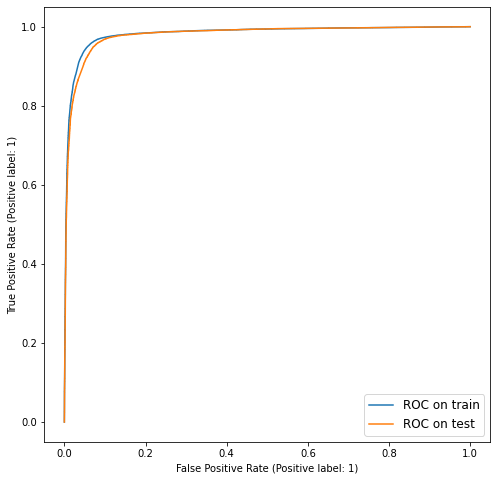

In [8]:
estimate_model(sgd_clf)

### 4.3 基于 `在线学习` 的 `SGD` 分类模型

#### 4.3.1 在线学习算法简介及理论

&emsp;&emsp;在线学习，是用数据实例持续地进行训练，可以一次一个或一次几个实例（称为`小批量`）。每个学习步骤都很快且`廉价`，所以系统可以动态地学习收到的最新数据。  
&emsp;&emsp;在线学习很适合系统接收连续流的数据（比如，股票价格），且需要自动对改变作出调整。如果计算资源有限，在线学习是一个不错的方案：一旦在线学习系统学习了新的数据实例，它就不再需要这些数据了，所以扔掉这些数据（除非你想滚回到之前的一个状态，再次使用数据）。这样可以节省大量的空间。   
&emsp;&emsp;在线学习算法也适用于在超大数据集（一台计算机不足以用于存储它）上训练系统（这称作核外学习，out-of-core learning）。算法每次只加载部分数据，用这些数据进行训练，然后重复这个过程，直到使用完所有数据。  
&emsp;&emsp;在线学习系统的一个重要参数是，它们可以多快地适应数据的改变：这被称为学习速率。如果设定一个高学习速率，系统就可以快速适应新数据，但是也会快速忘记老数据。相反的，如果设定的学习速率低，系统的惰性就会强：即，它学的更慢，但对新数据中的噪声或没有代表性的数据点结果不那么敏感。  
&emsp;&emsp;在线学习的挑战之一是，如果坏数据被用来进行训练，`系统的性能就会逐渐下滑`。如果这是一个部署的系统，用户就会注意到。例如，坏数据可能来自失灵的传感器或机器人，或某人向搜索引擎传入垃圾信息以提高搜索排名。要减小这种风险，需要密集监测，如果检测到性能下降，要快速关闭（或是滚回到一个之前的状态）。你可能还要监测输入数据，对反常数据做出反应（比如，使用异常检测算法）。   


&emsp;&emsp;许多在线学习问题本质上可以（重新）表述为在线`凸优化`（OCO）任务。下面，我们介绍OCO的一些基础知识。

&emsp;&emsp;在线凸优化任务通常有两个主要元素组成：凸集S和凸代价函数 $l_t(\cdot)$。在每个时间步长 $t$，在线算法决定选择一个权重向量 $w_t\in S$ ；此后，他遭受损 失$l_t(w_t)$ ，该损失是基于在 $s$ 上定义的凸成本函数 $l_t(\cdot)$ 计算的。在线算法的目标是选择一系列决策 $w_1,w_2,...$ 使得事后的损失最小化。$$R_T=\sum_{t=1}^{T}l_t(w_t)-\mathop{inf}\limits_{w^* \in S}\sum_{t=1}^{T}l_t(w^*) $$
其中 $w^*$ 是 $S$ 上最小化凸目标函数 $\sum_{t=1}^T l_t(w)$ 的解。

#### 4.3.2 基于 `在线学习` 的 `SGD` 分类模型训练

In [9]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import SGDClassifier

# 调用 stream_docs 流式读取数据，若不存在已预处理的数据，函数自动对数据进行预处理
doc_stream = stream_docs(file_processed)

vect = HashingVectorizer(decode_error='ignore', n_features=2**21, tokenizer=tokenizer)

sgd_online  = SGDClassifier(loss='log', random_state=1)

# 一共12万条数据，每次小批量处理1000条，一共分为120批次
# 按照7:3划分训练集和测试集，训练集85批次，测试机35批次

classes = np.array([0, 1])
for _ in range(85):
    X_train, y_train = get_minibatch(doc_stream, size=1000)
    if not X_train:  break
    X_train = vect.transform(X_train)
    sgd_online.partial_fit(X_train, y_train, classes=classes)


#### 4.3.3 SGD 分类模型在线学习的各项指标及ROC

In [10]:
# 将剩下的35000条作为测试集
X_test, y_test = get_minibatch(doc_stream, size=35000)
X_test = vect.transform(X_test)

训练集上的准确率：0.92600,	测试集上的准确率：0.91988
训练集上的精度：  0.89583,	测试集上的精度：0.89059
训练集上的召回率：0.96138,	测试集上的召回率：0.95817
训练集上的F1得分：0.92745,	测试集上的F1得分：0.92314
训练集上ROC面积: 0.97636, 测试集上ROC面积: 0.97252


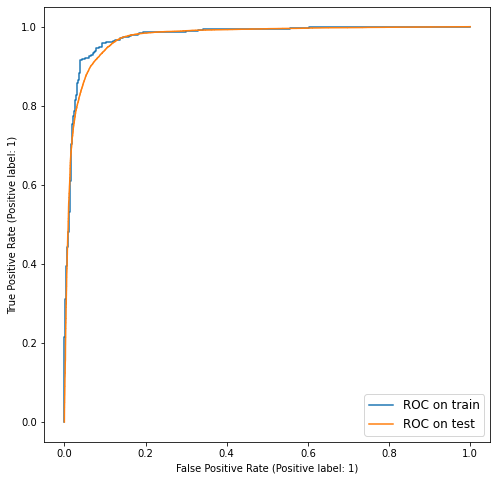

In [11]:
estimate_model(sgd_online)

## 5. 模型比较及结论

### 5.1 三种方案的训练时间、测试时间比较



表1：三种方案的时间性能 

|  | 逻辑回归模型 | SGD 分类模型 | 在线 SGD 模型 |
|:----------: |:----:  | :---: | :----: |
| **训练用时** | 10.62s | 6.21s | 1.54s |
| **测试用时** | 1.66s  | 1.44s | 0.25s |


注：
- 以上数据基于 sklearnex 模块对因特尔CPU训练模型加速的结果。
- 逻辑回归模型、SGD 分类模型均使用网格搜索的到的最有参数。
- 以上时间均取自多次运行的平均用时，不包括数据预处理用时。
- 由于主机的硬件等差异，不同主机上各模型的训练时间或有差异。

<br>

### 5.2 三种方案的各项指标比较


表2：训练集上各项指标

|   训练集    | 逻辑回归模型 | SGD 分类模型 | 在线 SGD 模型 |
|:---------: | :--------: | :--------: | :----------: |
| **准确率**  |  0.95380  |  0.94080   |   0.92600    |
| **精度**    |  0.93908  |  0.91563   |   0.89583    |
| **召回率**  |  0.97039  |  0.97087   |   0.96138    |
| **F1得分**  |  0.95448  |  0.94244   |   0.92745    |
| **ROC面积** |  0.98624  |  0.98172   |   0.97636   |


<br>


表3：测试集上各项指标

|   测试集    | 逻辑回归模型 | SGD 分类模型 | 在线 SGD 模型 |
|:---------: | :--------: | :--------: | :----------: |
| **准确率**  |  0.93280  |  0.93634   |   0.91988    |
| **精度**    |  0.91465  |  0.91277   |   0.89059    |
| **召回率**  |  0.95428  |  0.96449   |   0.95817    |
| **F1得分**  |  0.93404  |  0.93792   |   0.92314    |
| **ROC面积** |  0.97764  |  0.97895   |   0.97252    |


<br>

### 5.3 结论

#### 模型效率方面：
- SGD 分类模型在训练用时均低于逻辑回归超过40%。
- 在线学习的 SGD 模型在训练效率和测试效率上大大优于SGD 分类模型(即批量学习的SGD)。
- 在线 SGD 模型的训练用时表现极为突出。

#### 模型准确率方面：
- SGD 分类模型在测试集上大多数指标都略优于逻辑回归，两者不分伯仲。
- 在线 SGD 模型在测试机上的指标略低于 批量 SGD 分类模型(即批量学习的SGD)。

#### 综上：
> **1. SGD 分类模型相比逻辑回归模型，两者在在模型的预测效果上来说不分伯仲，但是SGD 分类模型训练用时、测试用时均占有一定优势。所以在中文文本情感分析上，可优先考虑 SGD 分类模型。**   
> 
> **2. 如若主机的内存有一定限制，或仍对 SGD 分类模型的训练用时不满意，可考虑在线学习，通过小批量的数据投喂，只需要占用极小的内存，即可快速训练出模型。且在训练用时上，在线学习的耗时远低于批量学习。但是在线学习所得模型在预测上的表现可能会低于批量学习。**

## 6. 参考文献

`[1]` 李德毅，于剑，中国人工智能学会，中国科协新一代信息技术系列丛书 人工智能导论，中国科学技术出版社，2018.08，第168页        
`[2]` 庞宇,基于中文 NLP 的计算机语言学关键问题的研究 [点击链接查看](https://xueshu.baidu.com/usercenter/paper/show?paperid=1q440rb0dd3p0c702f6q0xe06f428290&site=xueshu_se)